# MoNuSeg setup

In [115]:
import matplotlib.pyplot as plt 
import PIL
from PIL import Image

import pandas as pd
import numpy as np

import os
from os.path import join


In [116]:
!ls ../data/MoNuSeg/MoNuSegTrainingData/Annotations

TCGA-18-5592-01Z-00-DX1.xml  TCGA-DK-A2I6-01A-01-TS1.xml
TCGA-21-5784-01Z-00-DX1.xml  TCGA-E2-A14V-01Z-00-DX1.xml
TCGA-21-5786-01Z-00-DX1.xml  TCGA-E2-A1B5-01Z-00-DX1.xml
TCGA-38-6178-01Z-00-DX1.xml  TCGA-G2-A2EK-01A-02-TSB.xml
TCGA-49-4488-01Z-00-DX1.xml  TCGA-G9-6336-01Z-00-DX1.xml
TCGA-50-5931-01Z-00-DX1.xml  TCGA-G9-6348-01Z-00-DX1.xml
TCGA-A7-A13E-01Z-00-DX1.xml  TCGA-G9-6356-01Z-00-DX1.xml
TCGA-A7-A13F-01Z-00-DX1.xml  TCGA-G9-6362-01Z-00-DX1.xml
TCGA-AR-A1AK-01Z-00-DX1.xml  TCGA-G9-6363-01Z-00-DX1.xml
TCGA-AR-A1AS-01Z-00-DX1.xml  TCGA-HE-7128-01Z-00-DX1.xml
TCGA-AY-A8YK-01A-01-TS1.xml  TCGA-HE-7129-01Z-00-DX1.xml
TCGA-B0-5698-01Z-00-DX1.xml  TCGA-HE-7130-01Z-00-DX1.xml
TCGA-B0-5710-01Z-00-DX1.xml  TCGA-KB-A93J-01A-01-TS1.xml
TCGA-B0-5711-01Z-00-DX1.xml  TCGA-NH-A8F7-01A-01-TS1.xml
TCGA-CH-5767-01Z-00-DX1.xml  TCGA-RD-A8N9-01A-01-TS1.xml


In [117]:
!ls ../data/MoNuSeg/MoNuSegTrainingData/TissueImages

TCGA-18-5592-01Z-00-DX1.png  TCGA-DK-A2I6-01A-01-TS1.png
TCGA-21-5784-01Z-00-DX1.png  TCGA-E2-A14V-01Z-00-DX1.png
TCGA-21-5786-01Z-00-DX1.png  TCGA-E2-A1B5-01Z-00-DX1.png
TCGA-38-6178-01Z-00-DX1.png  TCGA-G2-A2EK-01A-02-TSB.png
TCGA-49-4488-01Z-00-DX1.png  TCGA-G9-6336-01Z-00-DX1.png
TCGA-50-5931-01Z-00-DX1.png  TCGA-G9-6348-01Z-00-DX1.png
TCGA-A7-A13E-01Z-00-DX1.png  TCGA-G9-6356-01Z-00-DX1.png
TCGA-A7-A13F-01Z-00-DX1.png  TCGA-G9-6362-01Z-00-DX1.png
TCGA-AR-A1AK-01Z-00-DX1.png  TCGA-G9-6363-01Z-00-DX1.png
TCGA-AR-A1AS-01Z-00-DX1.png  TCGA-HE-7128-01Z-00-DX1.png
TCGA-AY-A8YK-01A-01-TS1.png  TCGA-HE-7129-01Z-00-DX1.png
TCGA-B0-5698-01Z-00-DX1.png  TCGA-HE-7130-01Z-00-DX1.png
TCGA-B0-5710-01Z-00-DX1.png  TCGA-KB-A93J-01A-01-TS1.png
TCGA-B0-5711-01Z-00-DX1.png  TCGA-NH-A8F7-01A-01-TS1.png
TCGA-CH-5767-01Z-00-DX1.png  TCGA-RD-A8N9-01A-01-TS1.png


In [118]:
base_path = '../data/MoNuSeg/MoNuSegTrainingData/'
img_path = join(base_path,'TissueImages')
labels_path = join(base_path,'Annotations')


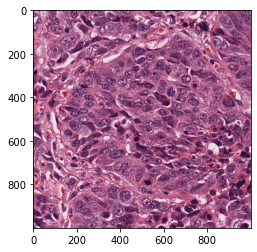

../data/MoNuSeg/MoNuSegTrainingData/TissueImages/TCGA-50-5931-01Z-00-DX1.png


In [219]:
img_filenames = sorted([p for p in os.listdir(img_path) if not 'ipynb' in p])

idx = 5
file_path = join(img_path, img_filenames[idx])

img = Image.open(file_path)
plt.imshow(img); plt.show()
print(file_path)

In [220]:
import xml

labels_filenames = sorted([p for p in os.listdir(labels_path) if not 'ipynb' in p])

file_path = join(labels_path, labels_filenames[idx])

doc = xml.dom.minidom.parse(file_path);
print(file_path)

../data/MoNuSeg/MoNuSegTrainingData/Annotations/TCGA-50-5931-01Z-00-DX1.xml


In [221]:
# get a list of all the region tags
regions = doc.getElementsByTagName('Region') 

In [222]:
# for each region tag
# get a list of all the vertexes (which are in order)
xy = []
for region in regions:
    verticies = region.getElementsByTagName('Vertex')
    xy.append([])
    
    # iterate through all verticies
    for vertex in verticies:
        # get the x value of that verte
        x = float(vertex.getAttribute('X'))
        # get the y value of that vertex
        y = float(vertex.getAttribute('Y'))
        
        xy[-1].append([x,y])



In [223]:
# https://github.com/scikit-image/scikit-image/issues/1103#issuecomment-52378754
from skimage import draw
import numpy as np
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    # https://github.com/scikit-image/scikit-image/issues/1103#issuecomment-52378754
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

In [224]:
n_img = np.array(img)
binary_mask = np.zeros(n_img.shape[:-1], dtype=np.bool)
color_mask = np.zeros_like(n_img, dtype=np.int32)
print(binary_mask.shape)
print(color_mask.shape)

(1000, 1000)
(1000, 1000, 3)


In [225]:
for i in range(len(xy)):
    points = np.array(xy[i])
    small_x = points[:,0]
    small_y = points[:,1]

    # make a mask and add it to the current mask
    # this addition makes it obvious when more than 
    # 1 layer overlap each.
    # Other, can be changed to simply an OR 
    # depending on application.
    
    polygon = poly2mask(small_x,small_y,n_img.shape[:-1])
    
    binary_mask |= polygon#.astype(int)
    
    r_rgb = np.random.randint(1,255,3)

    color_mask += np.concatenate(
        (
            np.expand_dims(polygon.astype(int)*r_rgb[0], 2),
            np.expand_dims(polygon.astype(int)*r_rgb[1], 2),
            np.expand_dims(polygon.astype(int)*r_rgb[2], 2),
        ),
        axis=2
    )

binary_mask = binary_mask.T

In [226]:
# Rotate
color_mask = Image.fromarray((color_mask*255).astype(np.uint8))
color_mask = color_mask.rotate(-90).transpose(PIL.Image.FLIP_LEFT_RIGHT)


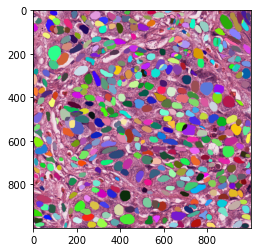

In [227]:
cond = np.array(color_mask)>0
colormasks = np.array(img)
colormasks[cond] = np.array(color_mask)[cond]

plt.imshow(colormasks)

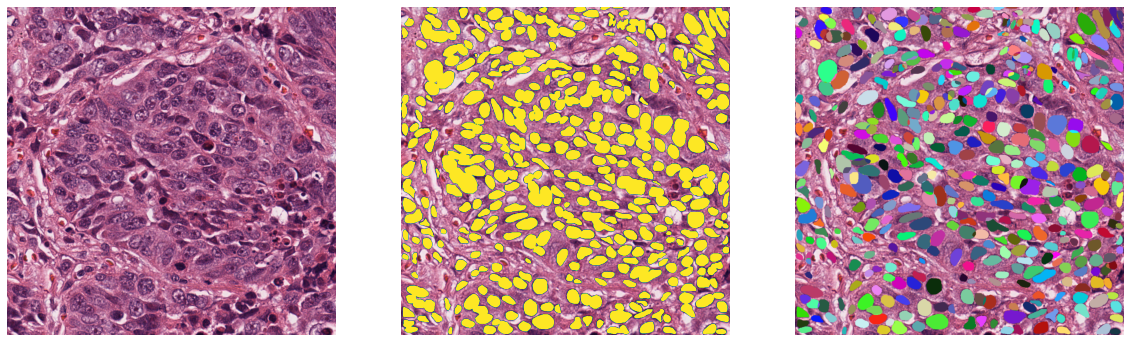

In [228]:
def plot_maps(img, binary_mask, colormasks):
    fig, ax = plt.subplots(1,3, figsize=(20,15))

    ax[0].imshow(img)

    ax[1].imshow(img)
    ax[1].imshow(binary_mask, alpha=binary_mask.astype(np.float32))

    ax[2].imshow(colormasks)

    for i in range(3):
        ax[i].set_axis_off()

    plt.show()
    
plot_maps(img, binary_mask, colormasks)

In [253]:
from skimage import draw
from skimage.draw import polygon_perimeter

edges = np.zeros((1000,1000), dtype=np.uint8)

for c in xy:
    coords = np.array(c)
    if len(coords) > 2: 
        rr,cc = polygon_perimeter(coords[:,1], coords[:,0], shape=edge.shape,clip=True)
        edges[rr, cc] = 255

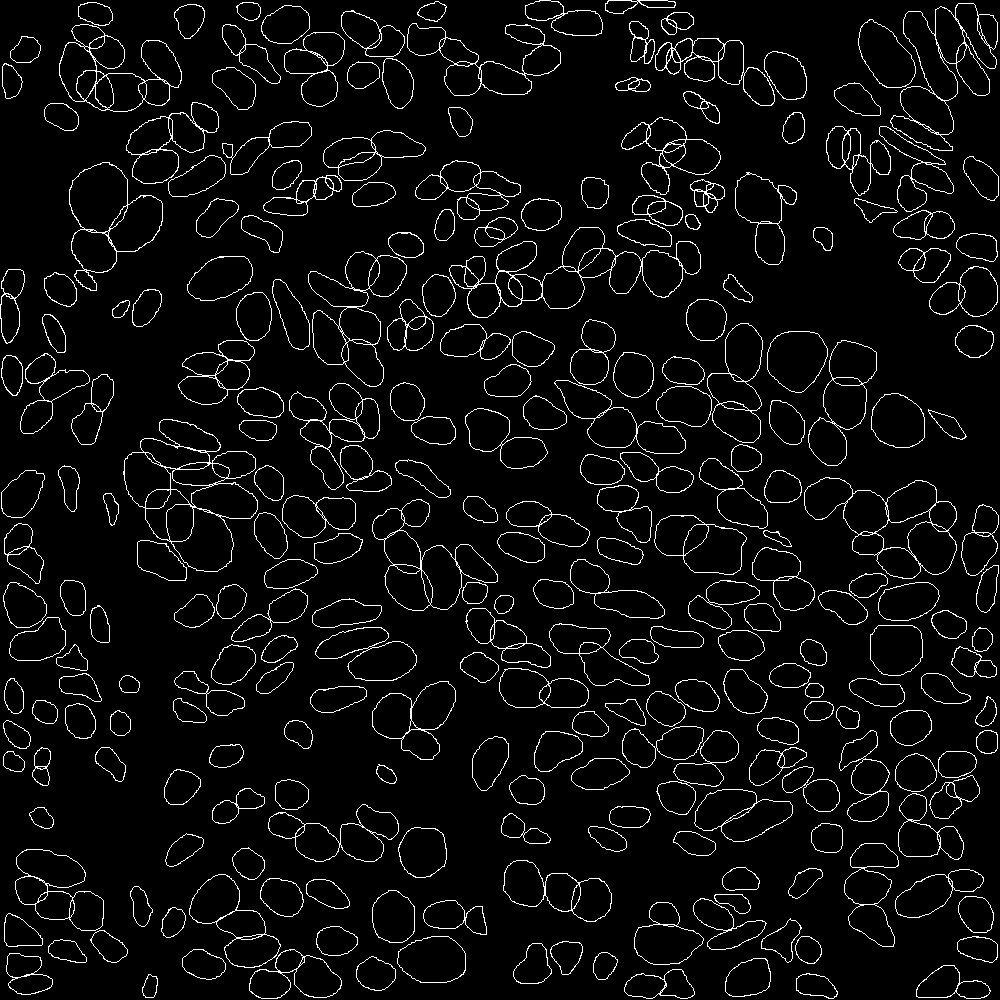

In [254]:
Image.fromarray(edges)

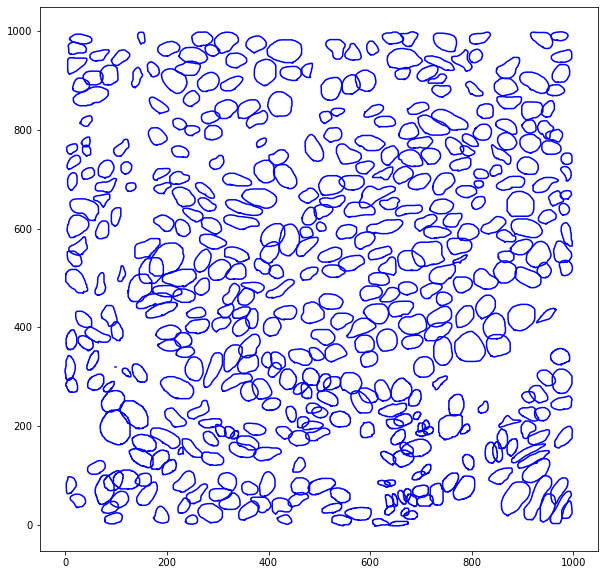

In [250]:
# Countur
# coords = np.array(xy)
plt.figure(figsize=(10,10))
# plt.imshow(edge)

# plt.imshow(img)

for c in xy:
    coords = np.array(c)
    plt.plot(coords[:,0], coords[:,1], 'b-')
plt.show()


# CPM17 setup 

In [16]:
base_path = '../data/CPM-17/cpm17/train'
img_path = join(base_path, 'Images')
labels_path = join(base_path, 'Labels')

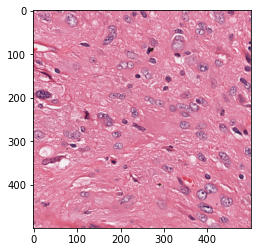

Number of images: 32
../data/CPM-17/cpm17/train/Images/image_00.png


In [17]:
img_filenames = sorted([p for p in os.listdir(img_path) if not 'ipynb' in p])

idx = 0
file_path = join(img_path, img_filenames[idx])

img = Image.open(file_path)
plt.imshow(img); plt.show()
print('Number of images:', len(img_filenames))
print(file_path)

In [18]:
import scipy.io

labels_filenames = sorted([p for p in os.listdir(labels_path) if not 'ipynb' in p])

file_path = join(labels_path, labels_filenames[idx])

mat = scipy.io.loadmat(file_path)
print(file_path)

../data/CPM-17/cpm17/train/Labels/image_00.mat


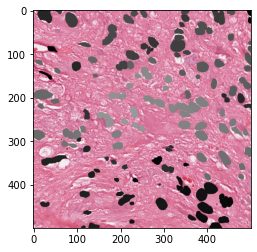

In [19]:
mask = mat['inst_map']
mask = np.repeat(mask[:,:,np.newaxis], 3, axis=2) 

masked_image = np.array(img)
masked_image[mask>0] = mask[mask>0]

plt.imshow(masked_image)

In [20]:
# Make binary mask
binary_mask = mat['inst_map']
binary_mask = (binary_mask > 0).astype(np.uint8)


In [21]:
# Make color mask
color_masks = np.zeros_like(mask)

for i in np.unique(mat['inst_map'])[1:]:
    r_rgb = np.random.randint(1, 255, 3)
    
    color_masks[mask[:,:,0]==i] = np.expand_dims(r_rgb, 0).repeat((mask[:,:,0]==i).sum(), axis=0)


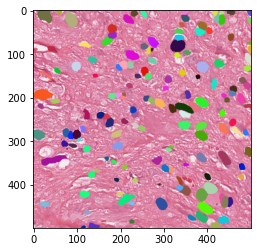

In [22]:
cond = np.array(color_masks)>0
colormasks = np.array(img)
colormasks[cond] = np.array(color_masks)[cond]

plt.imshow(colormasks)

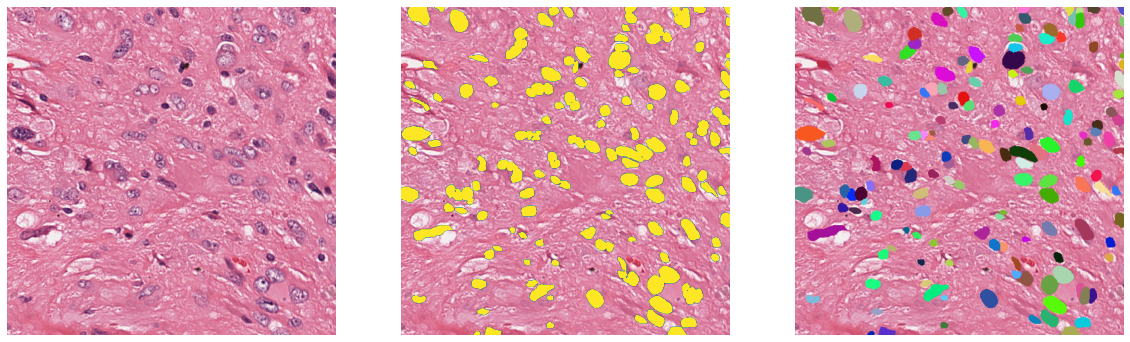

In [24]:
plot_maps(img, binary_mask, colormasks)

# CoNSeP

In [25]:
!ls ../data/CoNSeP/Train

Images	Labels	Overlay


In [26]:
base_path = '../data/CoNSeP/Train'
img_path = join(base_path, 'Images')
labels_path = join(base_path, 'Labels')

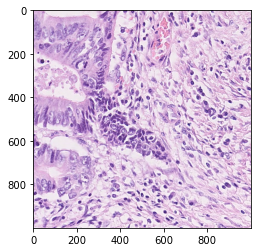

Number of images: 27
../data/CoNSeP/Train/Images/train_1.png


In [27]:
img_filenames = sorted([p for p in os.listdir(img_path) if not 'ipynb' in p])

idx = 0
file_path = join(img_path, img_filenames[idx])

img = Image.open(file_path)
plt.imshow(img); plt.show()
print('Number of images:', len(img_filenames))
print(file_path)

In [28]:
labels_filenames = sorted([p for p in os.listdir(labels_path) if not 'ipynb' in p])

file_path = join(labels_path, labels_filenames[idx])

mat = scipy.io.loadmat(file_path)
print(file_path)

../data/CoNSeP/Train/Labels/train_1.mat


In [29]:
inst_map = mat['inst_map']
type_map = mat['type_map']


Text(0.5, 1.0, 'Type map')

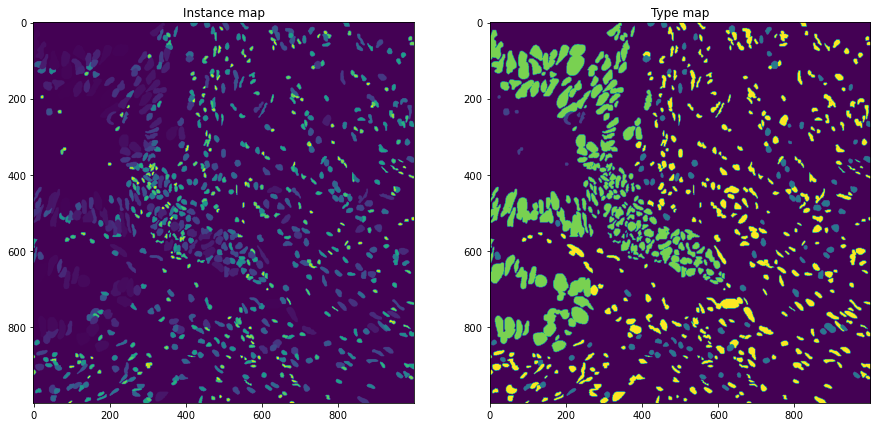

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

ax[0].imshow(inst_map)
ax[1].imshow(type_map)

ax[0].set_title('Instance map')
ax[1].set_title('Type map')

In [31]:
# Make binary mask
binary_mask = mat['inst_map']
binary_mask = (binary_mask > 0).astype(np.uint8)

mask = np.repeat(mat['inst_map'][:,:,np.newaxis], 3, axis=2) 


In [32]:
# Make color mask
color_masks = np.zeros_like(mask)

for i in np.unique(mat['inst_map'])[1:]:
    r_rgb = np.random.randint(1, 255, 3)
    
    color_masks[mask[:,:,0]==i] = np.expand_dims(r_rgb, 0).repeat((mask[:,:,0]==i).sum(), axis=0)


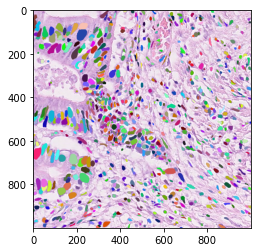

In [48]:
cond = np.array(color_masks)>0
colormasks = np.array(img)

colormasks[cond] = np.array(color_masks)[cond]

plt.imshow(colormasks)

In [46]:
# Cell type
t_mask = np.repeat(mat['type_map'][:,:,np.newaxis], 3, axis=2) 

type_mask = np.zeros_like(t_mask)

for i in np.unique(mat['type_map'])[1:]:
    r_rgb = np.random.randint(1, 255, 3)
    
    cond = t_mask[:,:,0]==i
    
    n_items = (cond).sum()
    ex_rgb = np.expand_dims(r_rgb, 0)
    
    type_mask[cond] = ex_rgb.repeat(n_items, axis=0)


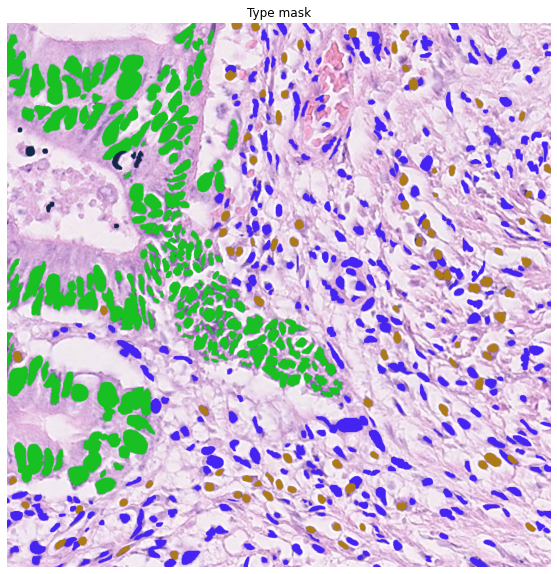

In [52]:
cond = np.array(type_mask)>0
typemasks = np.array(img)

typemasks[cond] = np.array(type_mask)[cond]

plt.figure(figsize=(10,10))
plt.imshow(typemasks)
plt.title('Type mask')
plt.axis('off')
plt.show()

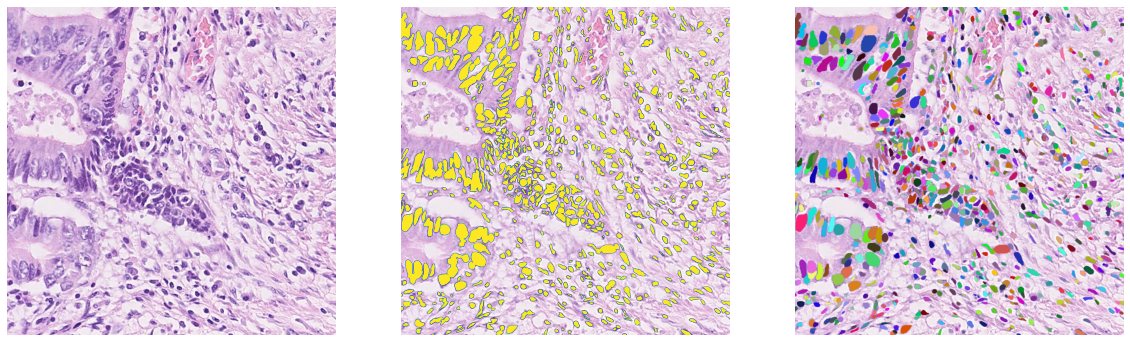

In [36]:
plot_maps(img, binary_mask, colormasks)

# Compose data to right format
## MoNuSeg

In [88]:
# NEW DATA FOLDERS
def mkdir(path):
    if not os.path.exists(path):
        os.mkdir(path)


data_dir = '../data/MoNuSeg_data'

train_imgs_dir = join(data_dir, 'train_images')
test_imgs_dir = join(data_dir, 'test_images')
all_masks_dir = join(data_dir, 'all_masks')
all_countuors_dir = join(data_dir, 'all_countuors')

mkdir(data_dir)
mkdir(train_imgs_dir)
mkdir(test_imgs_dir)
mkdir(all_masks_dir)
mkdir(all_countuors_dir)


In [109]:
# RAW DATA FOLDERS
raw_data_dir = '../data/MoNuSeg'
raw_train_dir = join(raw_data_dir, 'MoNuSegTrainingData')

raw_train_imgs_dir = join(raw_train_dir, 'TissueImages')
raw_train_anno_dir = join(raw_train_dir, 'Annotations')


raw_test_dir = join(raw_data_dir, 'MoNuSegTestData')
raw_test_imgs_dir = join(raw_test_dir, 'TissueImages')
raw_test_anno_dir = join(raw_test_dir, 'Annotations')


In [103]:
'''
+ Copy Images to new folder
    + Train
    + Test
- Copy Masks to new folder
    - Make Masks train
    - Make Masks test
- Copy Countuors to new folder
    - Make Countuors
'''
import shutil

In [104]:
# Copy Images to new folder
def copy_images(src_img_dir, dst_img_dir):
    imgs_fn = sorted([p for p in os.listdir(src_img_dir) if not 'ipynb' in p])

    for filename in imgs_fn:
        src = join(src_img_dir, filename)
        dst = join(dst_img_dir)
        shutil.copy(src, dst)
    
# Train
copy_images(raw_train_imgs_dir, train_imgs_dir)

# Test
copy_images(raw_test_imgs_dir, test_imgs_dir)
    

In [105]:
# Made Masks and save to new folder



In [106]:
# anno_fn = sorted([p for p in os.listdir(raw_train_anno_dir) if not 'ipynb' in p])

# img_filenames
# train_images_dir

In [113]:
images_fns = [fn for fn in os.listdir(raw_test_imgs_dir) if '.tif' in fn]
img = Image.open(join(raw_test_imgs_dir, images_fns[0]))

In [114]:
img.size

(1000, 1000)